In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn như bạn nói: data/train.csv, data/store.csv
train_df = pd.read_csv("data/train.csv", parse_dates=["Date"], low_memory=False)
store_df = pd.read_csv("data/store.csv")


In [2]:
# Chỉ giữ các ngày cửa hàng mở
train_open = train_df[train_df["Open"] == 1].copy()

# Sắp xếp theo thời gian để vẽ cho đẹp
train_open = train_open.sort_values("Date")


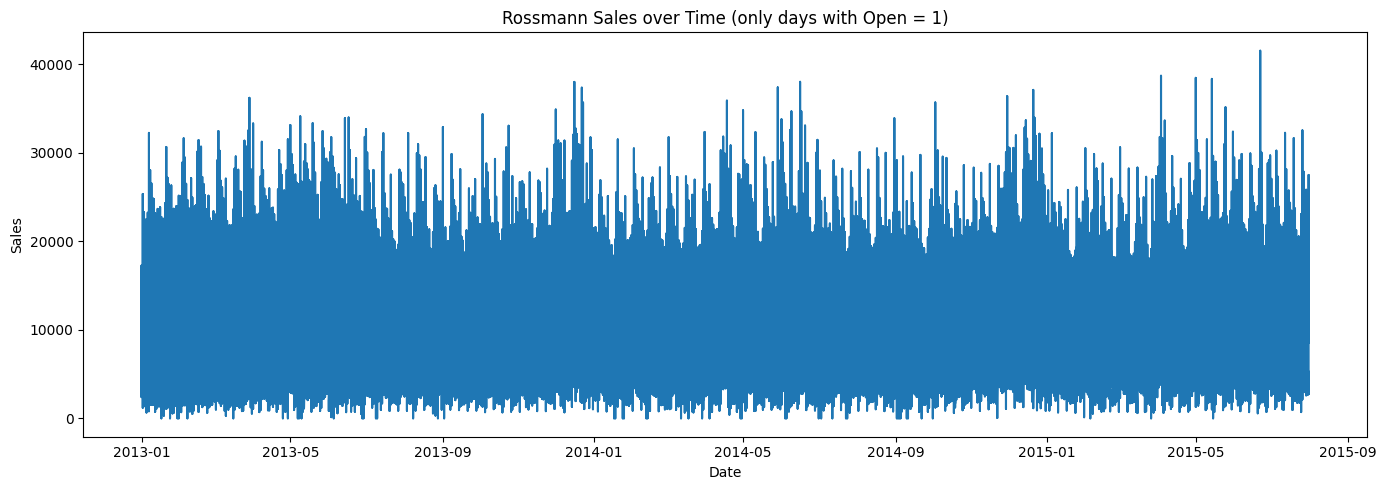

In [3]:
plt.figure(figsize=(14, 5))
plt.plot(train_open["Date"], train_open["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Rossmann Sales over Time (only days with Open = 1)")
plt.tight_layout()
plt.show()


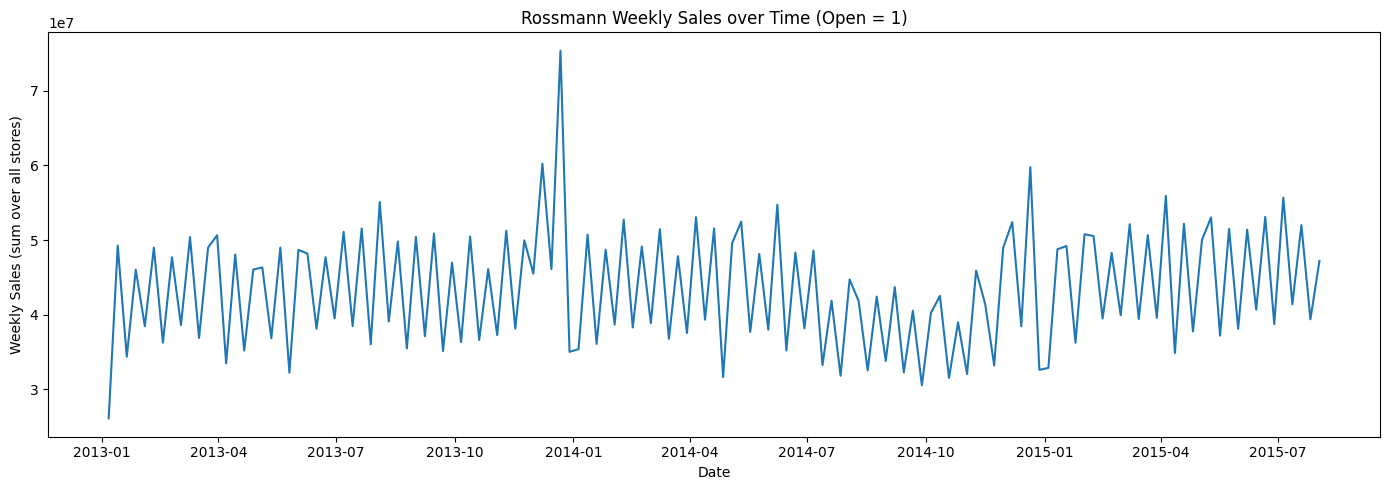

In [4]:
# Gộp theo ngày (phòng khi có nhiều store, sẽ lấy tổng sales toàn hệ thống mỗi ngày)
daily_sales = (
    train_open.groupby("Date")["Sales"]
    .sum()
    .reset_index()
    .sort_values("Date")
)

# Resample theo tuần (mean hoặc sum tuỳ mục đích)
weekly_sales = (
    daily_sales.set_index("Date")
    .resample("W")["Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 5))
plt.plot(weekly_sales["Date"], weekly_sales["Sales"])
plt.xlabel("Date")
plt.ylabel("Weekly Sales (sum over all stores)")
plt.title("Rossmann Weekly Sales over Time (Open = 1)")
plt.tight_layout()
plt.show()


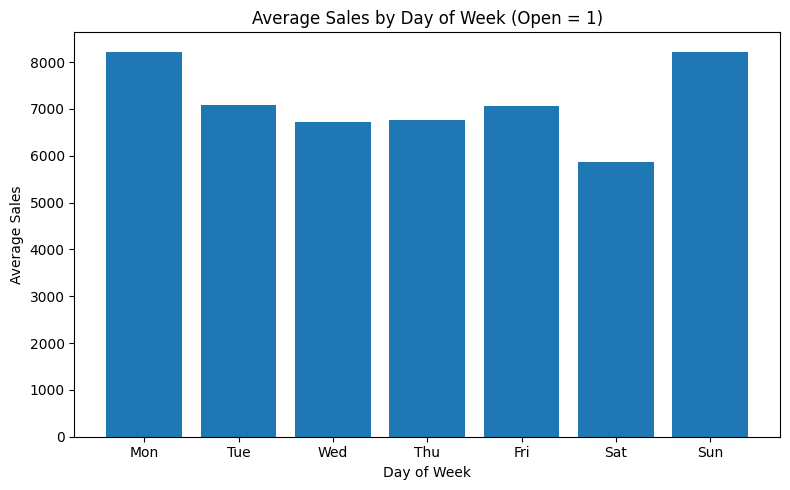

In [5]:
# Nếu đã có sẵn DayOfWeek thì bạn có thể bỏ dòng này
train_open["DayOfWeek"] = train_open["Date"].dt.dayofweek + 1  # Monday=1,...,Sunday=7
avg_sales_dow = (
    train_open.groupby("DayOfWeek")["Sales"]
    .mean()
    .reset_index()
    .sort_values("DayOfWeek")
)
dow_map = {
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat",
    7: "Sun",
}
avg_sales_dow["DayName"] = avg_sales_dow["DayOfWeek"].map(dow_map)
plt.figure(figsize=(8, 5))

plt.bar(avg_sales_dow["DayName"], avg_sales_dow["Sales"])

plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.title("Average Sales by Day of Week (Open = 1)")
plt.tight_layout()
plt.show()


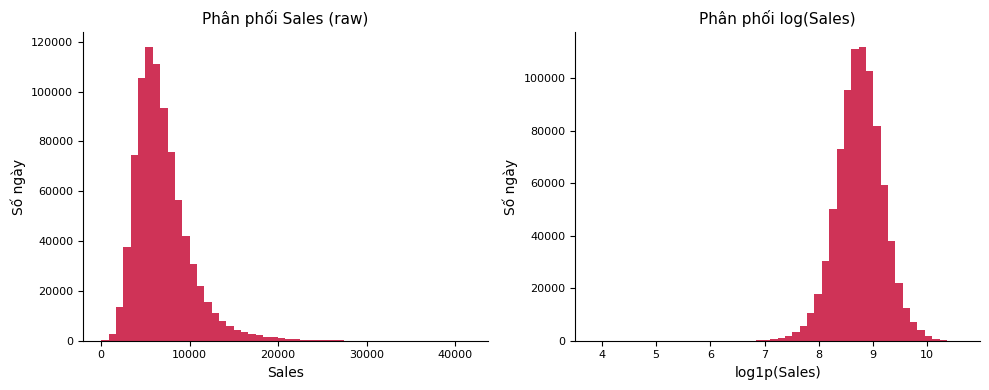

In [ ]:
ROSSMANN_RED = "#C3002D"

# Lấy Sales > 0 cho chắc chắn
sales = train_df.loc[train_df["Sales"] > 0, "Sales"].astype(float)
log_sales = np.log1p(sales)   # dùng log1p cho ổn định

plt.style.use("default")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax in axes:
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis="both", labelsize=8)

# Histogram Sales gốc
axes[0].hist(sales, bins=50, color=ROSSMANN_RED, alpha=0.8)
axes[0].set_title("Phân phối Sales (raw)", fontsize=11)
axes[0].set_xlabel("Sales", fontsize=10)
axes[0].set_ylabel("Số ngày", fontsize=10)

# Histogram log(Sales)
axes[1].hist(log_sales, bins=50, color=ROSSMANN_RED, alpha=0.8)
axes[1].set_title("Phân phối log(Sales)", fontsize=11)
axes[1].set_xlabel("log1p(Sales)", fontsize=10)
axes[1].set_ylabel("Số ngày", fontsize=10)

plt.tight_layout()
plt.show()
